# Crawl Top 100 Movies

## Install Dependencies

It is recommended to run this jupyter notebook in virtual environment to avoid dependency issues

In [ ]:
!pip install scrapy

## Run Crawler

The confiuration file is `maoyan/settings.py`

To avoid captcha, the request concurrency is limited to 1, and a 3 seconds delay is added after each request

HTTP cache is set to 30 days for testing

Without cache, the crawling can take up minutes

In [ ]:
!scrapy crawl --loglevel=INFO -O top100.csv top_100

# Data Analysis

## Install Dependencies

In [ ]:
!pip install pandas seaborn

## Read the CSV file

In [7]:
import pandas as pd

# read csv file
top_100 = pd.read_csv('top100.csv', dtype={
    'box_first_week': 'Int64',
    'box_sum': 'Int64',
    'celebrity': 'object',
    'date': 'str',
    'honor_count': 'Int64',
    'length': 'Int64',
    'name_alt': 'str',
    'name_cn': 'str',
    'nomination_count': 'Int64',
    'poster': 'str',
    'rank': 'Int64',
    'region': 'object',
    'score': 'float',
    'tag': 'object',
    'url': 'str',
}, parse_dates=[
    'date'
])

# cast data type
top_100['celebrity'] = top_100['celebrity'].apply(eval) # to dict
top_100['region'] = top_100['region'].apply(lambda s: s.split(',')) # to list
top_100['tag'] = top_100['tag'].apply(lambda s: s.split(',')) # to list

#for i, l in enumerate(top_100['tag']):
#    print(type(l))
# pd.Series([x for _list in top_100['tag'] for x in _list]).value_counts()

# 
# show result
top_100

,box_first_week,box_sum,celebrity,date,honor_count,length,name_alt,name_cn,nomination_count,poster,rank,region,score,tag,url
0,<NA>,<NA>,"{'导演': ['罗伯·莱纳'], '演员': ['玛德琳·卡罗尔', '卡兰·麦克奥利菲'...",2010-07-26,<NA>,90,Flipped,怦然心动,<NA>,https://p0.meituan.net/movie/15f1ac49b6d1ff7b7...,10,[美国],8.9,[爱情],https://www.maoyan.com/films/46818
1,<NA>,<NA>,"{'导演': ['吕克·贝松'], '演员': ['让·雷诺', '加里·奥德曼', '娜塔...",1994-09-14,0,110,Léon,这个杀手不太冷,9,https://p1.meituan.net/movie/6bea9af4524dfbd0b...,9,[法国],9.4,"[剧情, 动作, 犯罪]",https://www.maoyan.com/films/4055
2,2380,5979,"{'导演': ['罗伯托·贝尼尼'], '演员': ['罗伯托·贝尼尼', '朱斯蒂诺·杜拉...",2020-01-03,24,116,La vita è bella,美丽人生,16,https://p1.meituan.net/movie/580d81a2c78bf204f...,8,[意大利],9.3,"[战争, 剧情, 爱情]",https://www.maoyan.com/films/1303
3,4840,9675,"{'导演': ['是枝裕和'], '演员': ['中川雅也', '安藤樱', '松冈茉优',...",2018-08-03,19,121,万引き家族,小偷家族,32,https://p1.meituan.net/movie/ac8f0004928fbce5a...,7,[日本],8.1,"[剧情, 犯罪]",https://www.maoyan.com/films/1216365
4,<NA>,5,"{'导演': ['陈凯歌'], '演员': ['张国荣', '张丰毅', '巩俐', '吕齐...",1993-07-26,5,171,Farewell My Concubine,霸王别姬,3,https://p0.meituan.net/movie/61fea77024f83b370...,6,"[中国大陆, 中国香港]",9.4,"[剧情, 爱情]",https://www.maoyan.com/films/1203
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,<NA>,<NA>,"{'导演': ['拉斯·霍尔斯道姆'], '演员': ['Forest', '理查·基尔',...",2009-06-13,<NA>,93,Hachi: A Dog's Tale,忠犬八公的故事,<NA>,https://p1.meituan.net/movie/8236183afcf1bd0ff...,24,"[美国, 英国]",9.3,[剧情],https://www.maoyan.com/films/38286
96,<NA>,<NA>,"{'导演': ['托德·菲利普斯'], '演员': ['华金·菲尼克斯', '罗伯特·德尼罗...",2019-10-04,17,122,Joker,小丑,47,https://p0.meituan.net/moviemachine/7707dc3478...,23,[美国],8.6,"[剧情, 惊悚, 犯罪]",https://www.maoyan.com/films/1215201
97,10263,57288,"{'导演': ['李安'], '演员': ['苏拉·沙玛', '伊尔凡·可汗', '塔布',...",2012-11-22,26,127,Life of Pi,少年派的奇幻漂流,52,https://p0.meituan.net/movie/cac99bd00d40586dc...,22,"[美国, 中国台湾, 英国, 加拿大]",9.0,"[剧情, 奇幻, 冒险]",https://www.maoyan.com/films/995
98,17036,37684,"{'导演': ['娜丁·拉巴基'], '演员': ['赞恩·阿尔·拉菲亚', '约丹诺斯·希...",2019-04-29,2,116,كفرناحوم,何以为家,13,https://p1.meituan.net/movie/d28b729ffe72353a7...,21,[黎巴嫩],9.3,[剧情],https://www.maoyan.com/films/1218727


## Draw Plots

Import the seaborn library

In [8]:
import seaborn as sns

# Fix zh_CN font
# Make sure you have SimHei font installed in your system. 
# If not, install the font, clear the cache in ~/.cache/matplotlib, then restart jupyter
sns.set(style="darkgrid", font="SimHei")

### User rating distribution

<AxesSubplot:xlabel='score', ylabel='Count'>

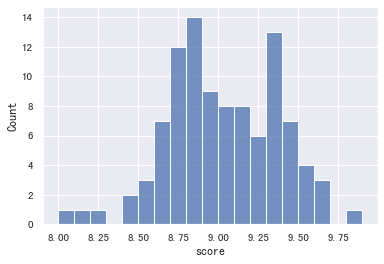

In [11]:
sns.histplot(top_100, x='score', binwidth=0.1)

### Date distibution

<AxesSubplot:xlabel='date', ylabel='Count'>

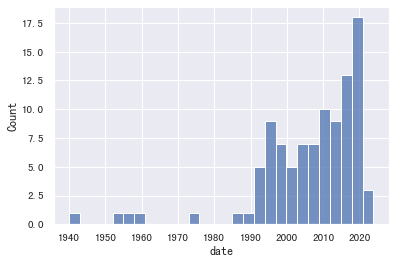

In [12]:
sns.histplot(top_100, x='date', binwidth=365*3)

### Length distribution

<AxesSubplot:xlabel='length', ylabel='Count'>

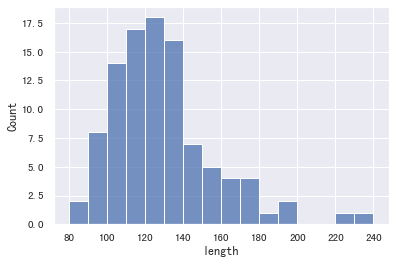

In [13]:
sns.histplot(top_100, x='length', binwidth=10)

### Scatterplot

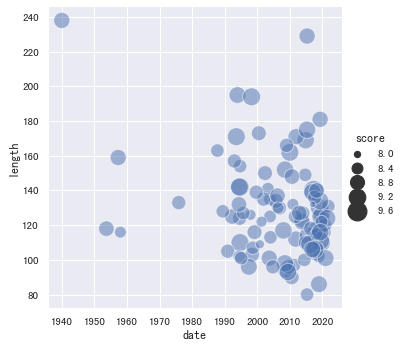

In [14]:
sns.relplot(data=top_100, x='date', y='length', size='score', sizes=(40,400), alpha=.5)

### Tag count

<AxesSubplot:xlabel='count'>

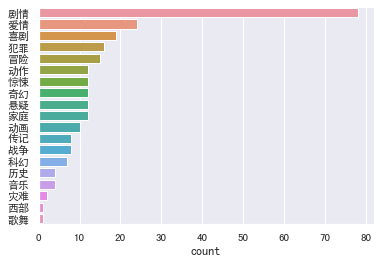

In [10]:
df_flat_tag = pd.Series([x for _list in top_100['tag'] for x in _list])
sns.countplot(y=df_flat_tag, order=df_flat_tag.value_counts().index)

### Region count

<AxesSubplot:xlabel='count'>

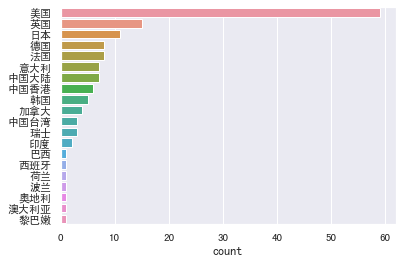

In [9]:
df_flat_tag = pd.Series([x for _list in top_100['region'] for x in _list])
sns.countplot(y=df_flat_tag, order=df_flat_tag.value_counts().index)